In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.image import imread 
import cv2 
from matplotlib import image as mpimg
import random 
from os import listdir
from sklearn.preprocessing import LabelBinarizer 
from keras.preprocessing import image 
from keras.preprocessing.image import img_to_array , array_to_img
from keras.optimizers import Adam 
from keras.models import Sequential 
from keras.layers import Conv2D , MaxPooling2D , Activation , Flatten , Dropout , Dense 
from sklearn.model_selection import train_test_split 



2024-01-20 21:46:43.269114: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-20 21:46:43.304486: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-20 21:46:43.407823: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-20 21:46:43.407873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-20 21:46:43.415020: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
os.listdir()

['main.ipynb', '.git', '.gitignore', 'a']

In [3]:
listdir()

['main.ipynb', '.git', '.gitignore', 'a']

In [4]:
test = random.choice(listdir('a/train/ABBOTTS BOOBY'))
path = 'a/train/ABBOTTS BOOBY/' + test 

In [5]:
img = path 

In [6]:
img = mpimg.imread(path)

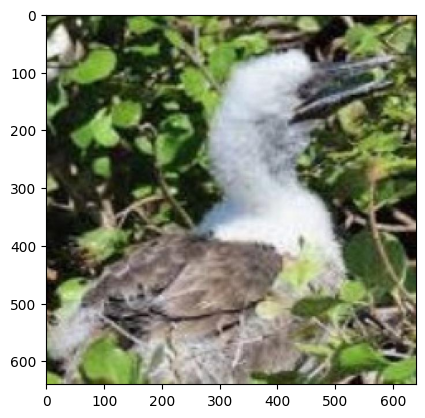

In [7]:
plt.imshow(img)
plt.show()

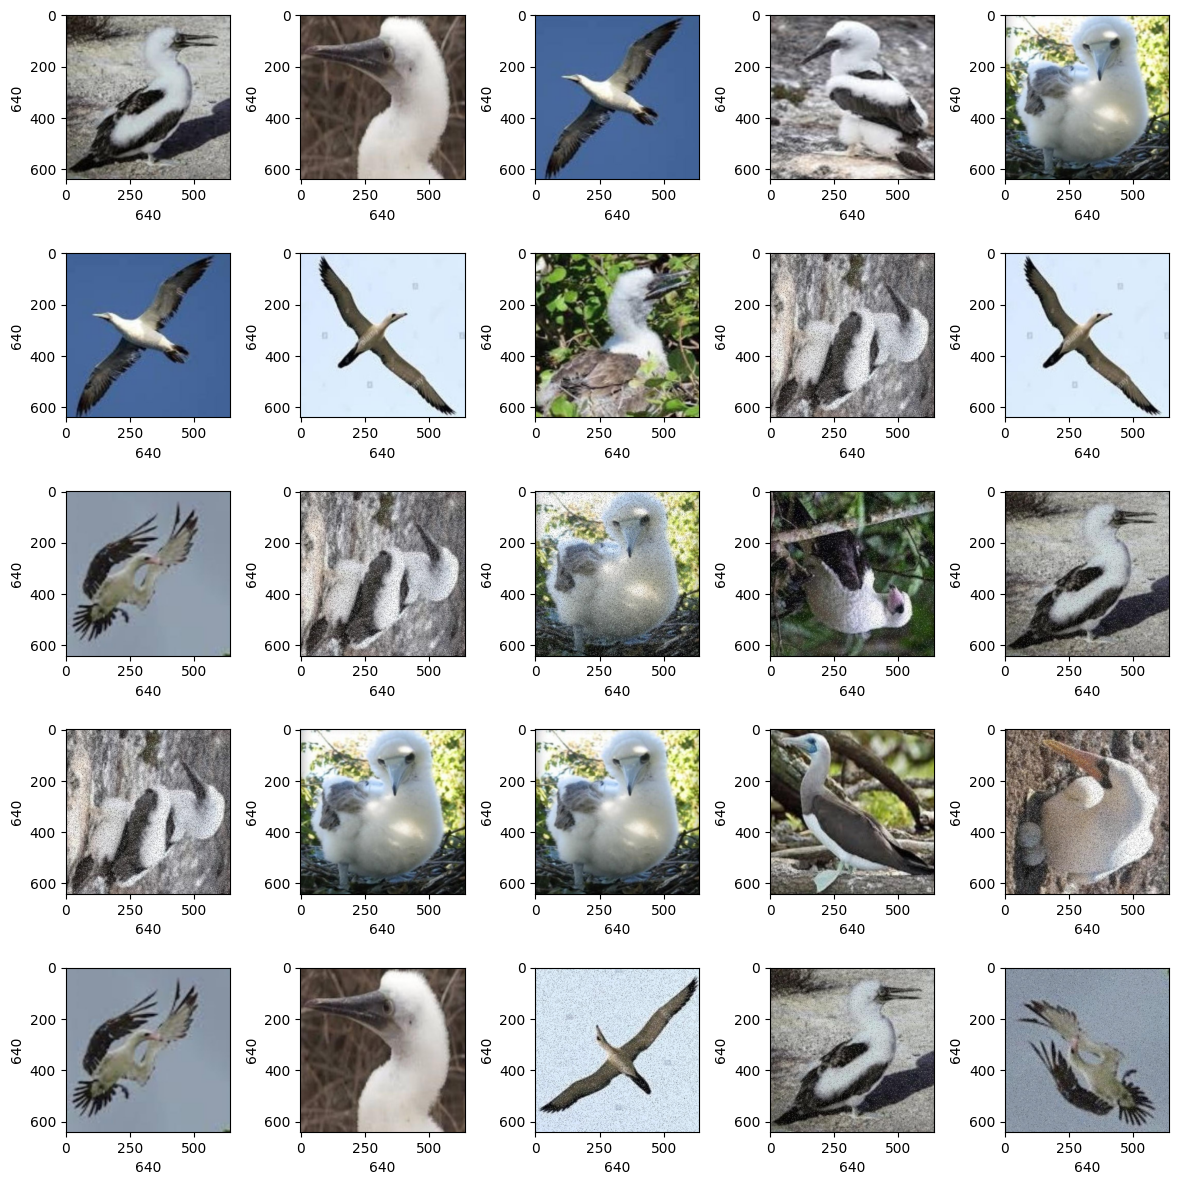

In [8]:
#ploting 5 images from adbotts booby 
plt.figure(figsize =( 12 ,12 ))
path = 'a/train/ABBOTTS BOOBY/'
for i in range( 1   , 26):
    plt.subplot( 5 , 5 , i )
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(listdir(path)))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1]  )
    plt.ylabel(rand_img.shape[0]  )


note that all images should have equal dimension to train 
for my case i have  640 dimension 

In [9]:
#creating two empty lilst for images and list 
path = '/home/ujjwal/ujjwal/Bird Species Prediction'

In [10]:
from pathlib import Path 
path_ = Path(path)


In [11]:
import os
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array

def data_generator(main_directory, batch_size=32):
    # Path to the 'files' folder
    files_folder_path = os.path.join(main_directory, 'a', 'files')

    while True:
        # Lists to store batch images and labels
        batch_images = []
        batch_labels = []

        # Loop through each bird species folder
        for species_folder in os.listdir(files_folder_path):
            species_path = os.path.join(files_folder_path, species_folder)

            # List all image files in the current species folder
            image_files = [f for f in os.listdir(species_path) if f.endswith('.jpg') or f.endswith('.png')]

            # Loop through each image file
            for image_file in image_files:
                image_path = os.path.join(species_path, image_file)

                # Read the image using OpenCV
                image = cv2.imread(image_path)

                # Convert the image to a NumPy array using img_to_array and reshape it
                image_array = img_to_array(image)
                image_array = cv2.resize(image_array, (640, 640))  # Resize to (640, 640)

                # Append the image array to the batch_images
                batch_images.append(image_array)

                # Append the corresponding label (directory path) to the batch_labels
                batch_labels.append(species_folder)

                # Check if the batch is complete
                if len(batch_images) == batch_size:
                    yield (np.array(batch_images), np.array(batch_labels))
                    # Clear the lists for the next batch
                    batch_images = []
                    batch_labels = []

        # Check if there are remaining images in the last batch
        if batch_images:
            yield (np.array(batch_images), np.array(batch_labels))

# Example usage
main_directory =path 
batch_size = 600

# Create the generator
generator = data_generator(main_directory, batch_size=batch_size)

# Get the first batch
batch_images, batch_labels = next(generator)


In [20]:
batch_images.shape

(600, 640, 640, 3)

In [27]:
batch_images[0].shape # 640 , 640 dimension and 3 mans r , g , b 
label_list = np.array(batch_labels)
label_list.shape #600 lables 

(600,)

In [28]:
#train test split data 
x_train , x_test , y_train , y_test = train_test_split(batch_images , label_list , test_size= 0.2, random_state= 10 )